In [1]:
import pandas as pd
import numpy as np

In [2]:
test_set=pd.read_csv("emnist-letters-test.csv")
train_set=pd.read_csv("emnist-letters-train.csv")

In [3]:
print(test_set.shape)
print(train_set.shape)

(14799, 785)
(88799, 785)


In [4]:
y1 = np.array(train_set.iloc[:,0].values)
x1 = np.array(train_set.iloc[:,1:].values)
#testing_labels
y2 = np.array(test_set.iloc[:,0].values)
x2 = np.array(test_set.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


In [12]:
import tensorflow as tf

In [13]:
x1= x1.astype('float32') / 255
x2= x2.astype('float32') / 255

x1= x1.reshape((-1, 28, 28, 1))
x2= x2.reshape((-1, 28, 28, 1))

In [15]:
y1= tf.keras.utils.to_categorical(y1, 37)  # 37 classes (10 digits + 26 letters + 1 for unknown or garbage class)
y2= tf.keras.utils.to_categorical(y2, 37)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size=0.2,random_state = 42)
     

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(37,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 512)        0

In [23]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

In [27]:
from keras.callbacks import EarlyStopping 
early_stopping_callback= EarlyStopping(monitor='val_accuracy',
                                       min_delta=0,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

In [28]:
epochs = 15
batch_size = 100

In [29]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stopping_callback])

Epoch 1/15
711/711 [==============================] - 56s 77ms/step - loss: 0.6476 - accuracy: 0.7987 - val_loss: 0.2703 - val_accuracy: 0.9093
Epoch 2/15
711/711 [==============================] - 57s 81ms/step - loss: 0.2566 - accuracy: 0.9135 - val_loss: 0.2330 - val_accuracy: 0.9197
Epoch 3/15
711/711 [==============================] - 51s 72ms/step - loss: 0.2044 - accuracy: 0.9290 - val_loss: 0.2117 - val_accuracy: 0.9243
Epoch 4/15
711/711 [==============================] - 59s 83ms/step - loss: 0.1741 - accuracy: 0.9386 - val_loss: 0.2011 - val_accuracy: 0.9287
Epoch 5/15
711/711 [==============================] - 54s 76ms/step - loss: 0.1545 - accuracy: 0.9435 - val_loss: 0.1941 - val_accuracy: 0.9351
Epoch 6/15
711/711 [==============================] - 59s 83ms/step - loss: 0.1373 - accuracy: 0.9487 - val_loss: 0.1979 - val_accuracy: 0.9300
Epoch 7/15
711/711 [==============================] - 57s 79ms/step - loss: 0.1258 - accuracy: 0.9527 - val_loss: 0.1919 - val_accuracy:

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

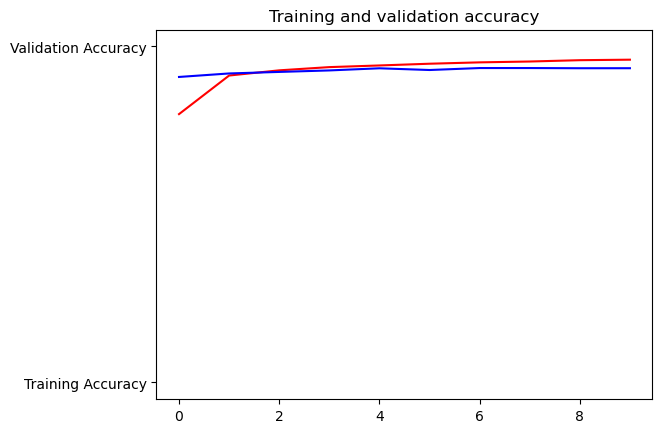

In [32]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

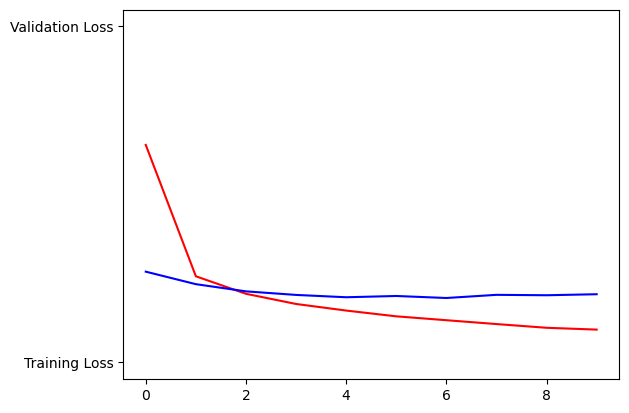

In [33]:
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()